In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Building a FacetGrid

Los gráficos de tipo **FacetGrid** son la base a la hora de construir plots a través de grids. Estos grids nos permiten crear series de pequeños gráficos que pueden ser útiles para comprender relaciones complejas en nuestros datos.

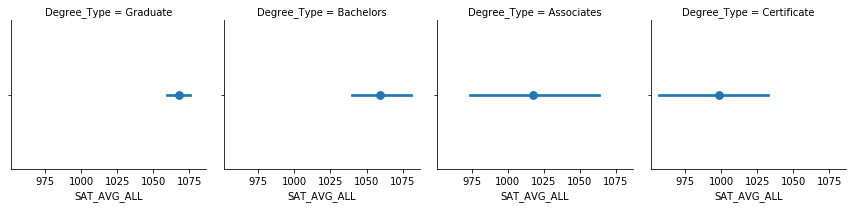

In [14]:
#Cargamos los datos
df = pd.read_csv('college_datav3.csv')

#Nos creamos el Facet Grid
g2 = sns.FacetGrid(df,
                  col = 'Degree_Type',
                  col_order = ['Graduate', 'Bachelors', 'Associates', 'Certificate'])

#Mapeamos el grid de la forma que deseemos, en este caso vamos a proceder a crear un point plot
g2.map(sns.pointplot, 'SAT_AVG_ALL')

#Mostramos los resultados
plt.show()
plt.clf()

# Using a factorplot

En muchas ocasiones, **factorplot()** puede ser una forma simple de crear un **FacetGrid**. En lugar de crear en primer lugar el grid y luego mapear el plot, podemos hacer uso de **factorplot()** para crear el plot de forma directa.

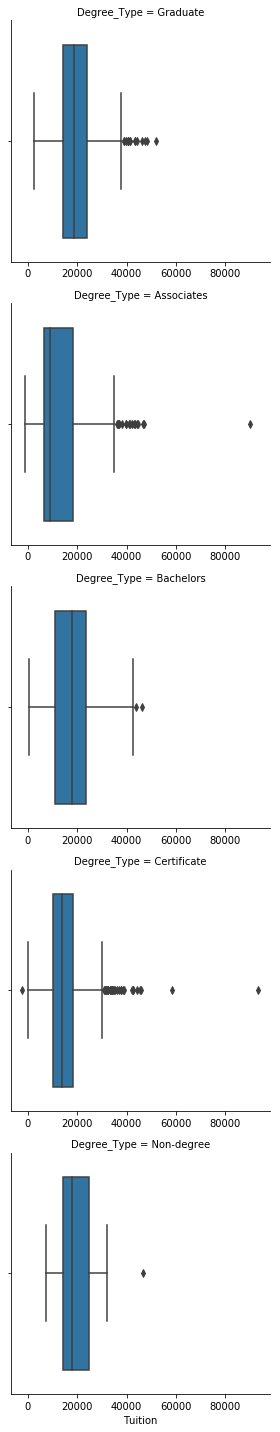

In [17]:
#Nos creamos un factorplot con boxplots
sns.factorplot(data = df,
              x = 'Tuition',
              kind = 'box',
              row = 'Degree_Type')

plt.show()
plt.clf()

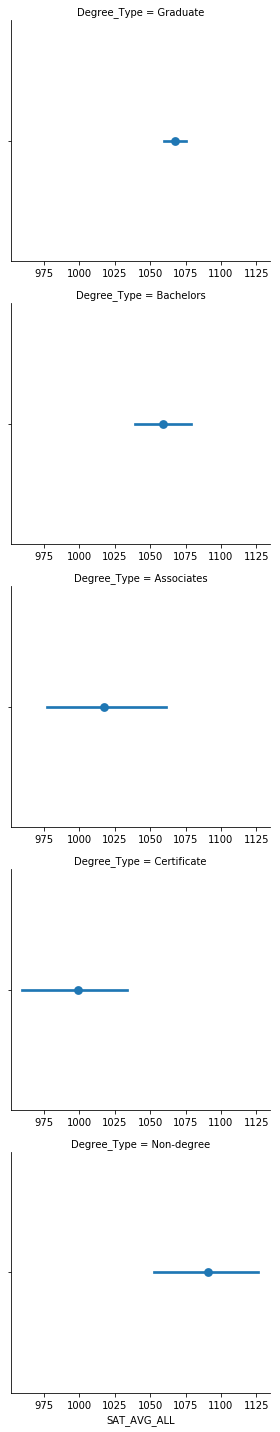

In [19]:
#Nos creamos un factorplot de tipo pointplot
sns.factorplot(data = df,
               x = 'SAT_AVG_ALL',
              kind = 'point',
              row = 'Degree_Type',
              row_order = ['Graduate', 'Bachelors', 'Associates', 'Certificate', 'Non-degree'])

plt.show()
plt.clf()

# Using a lmplot

Los gŕaficos **lmplot()** son usados para mostrar scatter plots con líneas de regresión en objetos de tipo FacetGrids. 

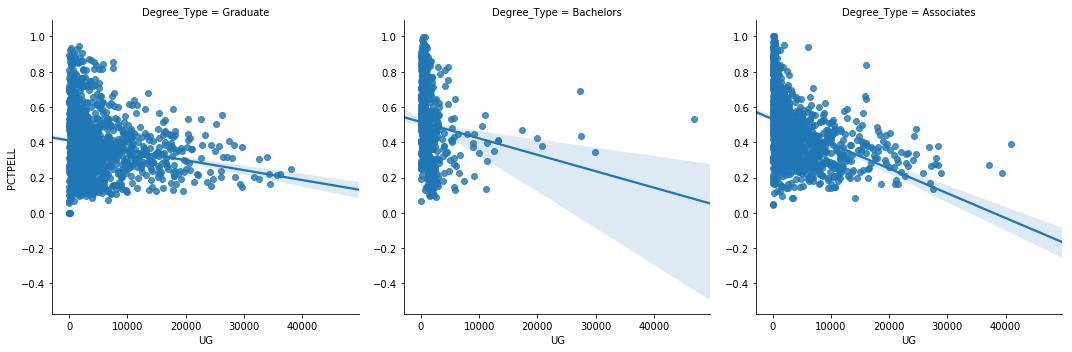

In [24]:
#Nos creamos nuestr gráfico lmplot
sns.lmplot(data = df, 
          x = 'UG',
          y = 'PCTPELL',
          col = 'Degree_Type',
          col_order = ['Graduate', 'Bachelors', 'Associates'])

plt.show()
plt.clf()

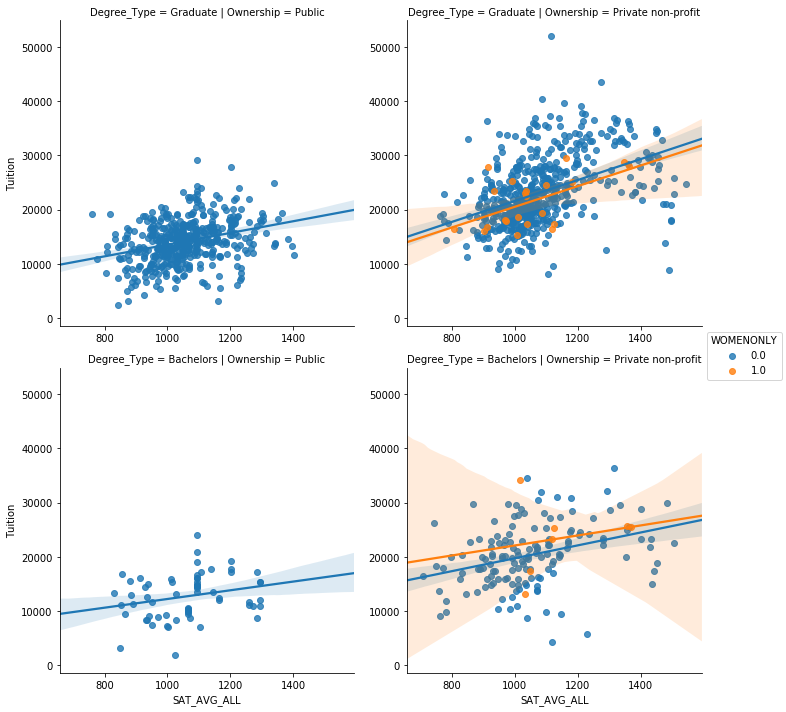

In [25]:
#Nos creamos un gráfico de tipo lmplot donde las columnas y las filas varien
sns.lmplot(data = df,
          x = 'SAT_AVG_ALL',
          y = 'Tuition',
          col = 'Ownership',
          row = 'Degree_Type',
          row_order = ['Graduate', 'Bachelors'],
          hue = 'WOMENONLY',
          col_order = ['Public', 'Private non-profit'])

plt.show()
plt.clf()

# Building a PairGrid

Cuando estamos realizando la exploración de un conjunto de datos, una de las primeras tareas debería ser explorar la relación existente entre pares de variables. Para realizar esta tarea **seaborn** dispone de **PairGrid**.

In [29]:
#Cargamos los datos
df = pd.read_csv('insurance_premiums.csv')
df.head(3)

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West


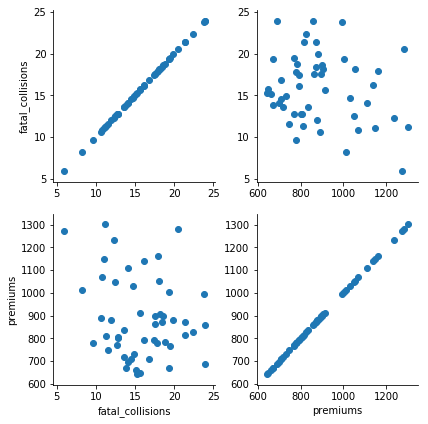

In [46]:
#Procedemos a crearnos nuestro PairGrid para ver si existe relacón entre el gasto en seguros de un estado con el 
#número de colisiones mortales
g = sns.PairGrid(df,
                vars = ['fatal_collisions', 'premiums'],
                size = 3)
g2 = g.map(plt.scatter)
plt.show()
plt.clf()

Por defecto en la diagonal principal nos muestra la distribución marginal de cada una de las variables usadas. Esto lo podemos modificar.

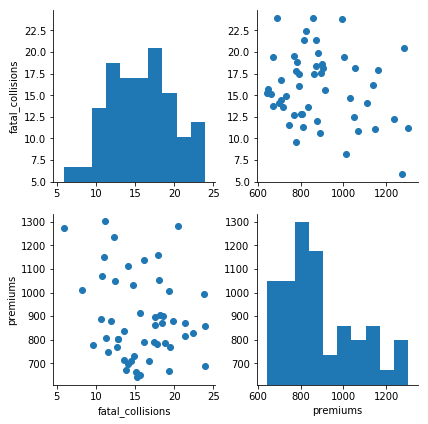

In [45]:
#Nos creamos nuestro PairGrid
g = sns.PairGrid(data = df,
            vars = ['fatal_collisions', 'premiums'],
                size = 3)

g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

# Using a pairplot

La función **pairplot()** se trata de una funcion mucho más conveniente para ver este tipo de relaciones.

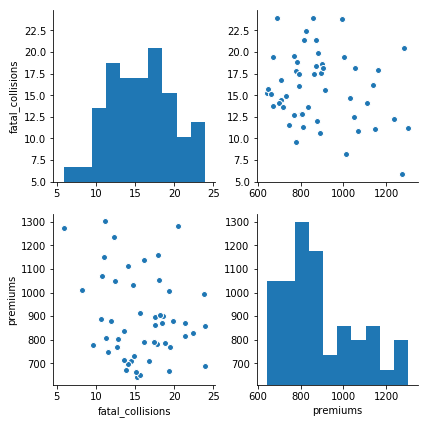

In [44]:
#Nos creamos nuestro pairplot
sns.pairplot(df,
            vars = ['fatal_collisions', 'premiums'],
            kind = 'scatter',
            size = 3)
plt.show()
plt.clf()

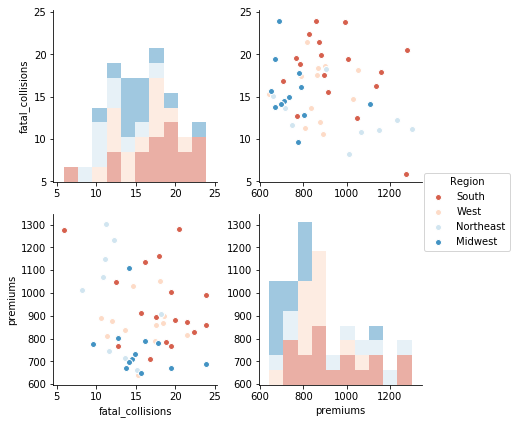

In [43]:
#Nos creamos un nuevo pairplot mejorado
sns.pairplot(df,
            vars = ['fatal_collisions', 'premiums'],
            kind = 'scatter',
            hue = 'Region',
            palette = 'RdBu',
            diag_kws = {'alpha': .5},
            size = 3)

plt.show()
plt.clf()

# Additional pairplots

La función **pairplot()** dispone de los argumentos **x_vars** y **y_vars** que nos permiten seleccionar las iteraciones que deseamos visualizar.

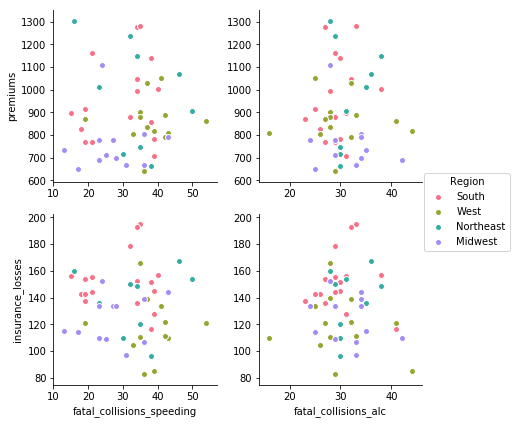

In [42]:
sns.pairplot(df, 
            x_vars = ['fatal_collisions_speeding', 'fatal_collisions_alc'],
            y_vars = ['premiums', 'insurance_losses'],
            kind = 'scatter',
            hue = 'Region',
            palette = 'husl',
            size = 3)

plt.show()
plt.clf()

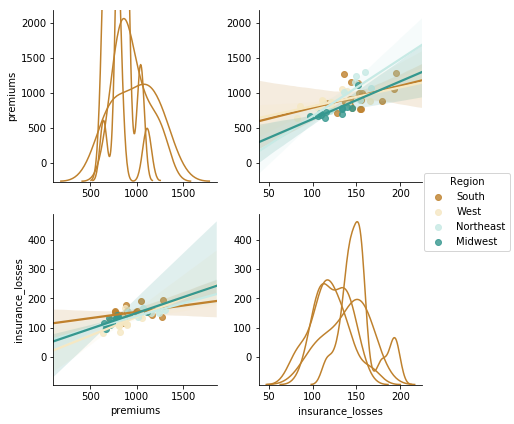

In [41]:
#Nos podemos crear un gráfico que nos permita visualizar la kde en la diagonal principal y la regresión en el resto
sns.pairplot(df,
            vars = ['premiums', 'insurance_losses'],
            kind = 'reg',
            diag_kind = 'kde',
            palette = 'BrBG',
            hue = 'Region',
            size = 3)
plt.show()

# Building a JointGrid and jointplot

Los gráficos **JointGrid** combina plots de una sola dimensión como histogramas, rug plots y kde plots con plots de dos dimensiones como gráficos de tipo scatter y de regresión. Este tipo de gráficos son realmente útiles y deberíamos estar familiarizados con ellos. 

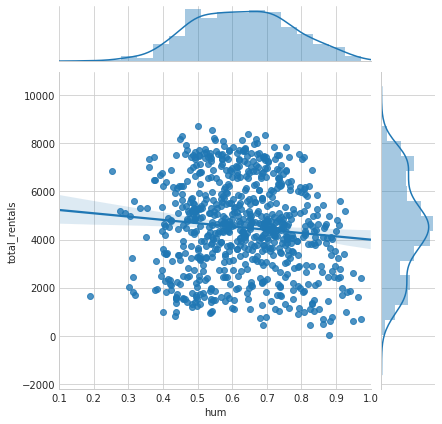

In [3]:
#Cargamos los datos
df = pd.read_csv('bike_share.csv')

#Nos creamos nuestro gráfico de tipo JointGrid
sns.set_style('whitegrid')
g = sns.JointGrid(x = 'hum',
                 y = 'total_rentals',
                 data = df, 
                 xlim = (0.1, 1.0))
g.plot(sns.regplot, sns.distplot)
plt.show()

Los gráficos de tipo **jointplot()** son una forma más sencilla de realizar este tipo de gráficos ya que por defecto incluyen ya ciertas capas, además que nos aportar información de ciertos estadísticos.

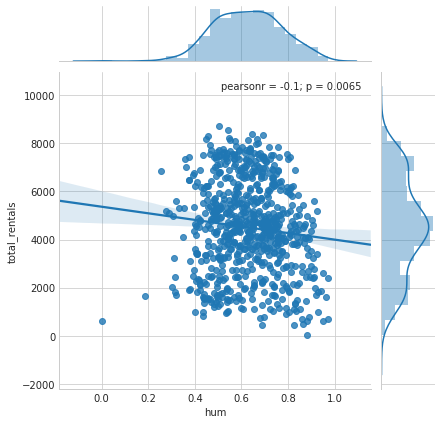

In [5]:
#Nos creamos un gráfico de tipo jointplot
sns.jointplot(x = 'hum',
             y = 'total_rentals',
             kind = 'reg',
             data = df)
plt.show()

# Jointplots and regression

Los gráficos de tipo **jointplot** nos permiten fijar por ejemplo, regresiones de orden polinomiales.

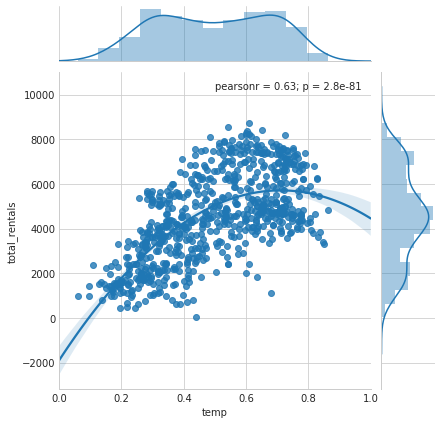

In [7]:
sns.jointplot(x = 'temp',
             y = 'total_rentals',
             kind = 'reg',
             data = df,
             order = 2,
             xlim = (0, 1))
plt.show()

Incluso nos permite fijar un regresor de orden 2, y ver los residuos, de esta forma podemos saber realmente como de bien se ajusta la regresión a nuestro conjunto de datos.

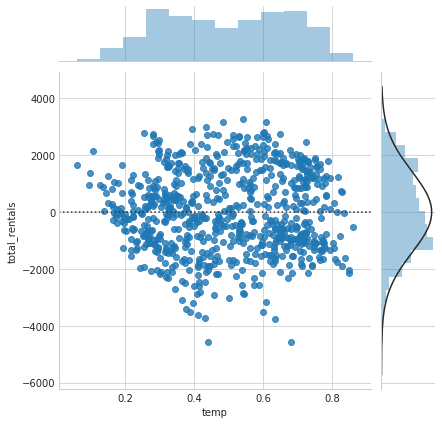

In [8]:
sns.jointplot(x = 'temp',
             y = 'total_rentals',
             kind = 'resid',
             data = df,
             order = 2)
plt.show()

# Complex jointplots

Una de las cosas que nos permiten este tipo de gráficos es realiar una mezcla, por ejemplo, podemos crearnos un jointplot de tipo scatter y recubrirlo con un gráfico de tipo kde.

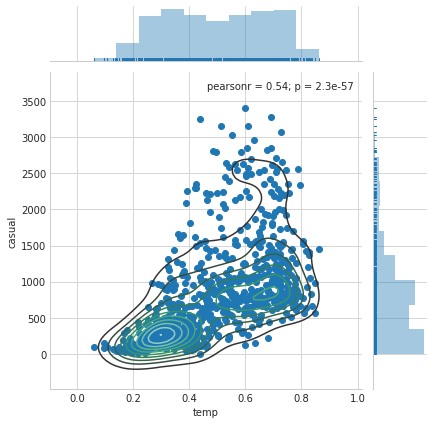

In [9]:
g = (sns.jointplot(x = 'temp',
                  y = 'casual',
                  kind = 'scatter',
                  data = df,
                  marginal_kws = dict(bins = 10, rug = True)).plot_joint(sns.kdeplot))
plt.show()

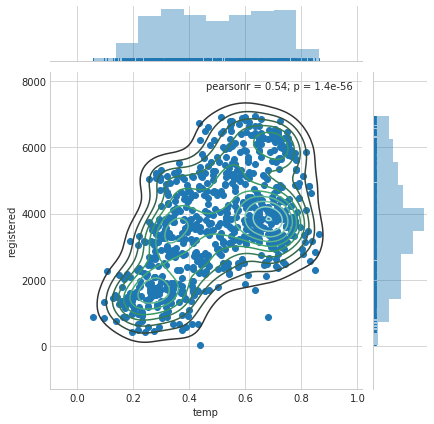

In [10]:
g = (sns.jointplot(x = 'temp',
                  y = 'registered',
                  kind = 'scatter',
                  data = df,
                  marginal_kws = dict(bins = 10, rug = True)).plot_joint(sns.kdeplot))
plt.show()